In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
google_data = pd.read_csv("GooglePayIndia.csv")
paytm_data = pd.read_csv("PaytmIndia.csv")
phonepay_data = pd.read_csv("PhonePayIndia.csv")

In [113]:
google_data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,18-11-2021 17:03,Hi Len. Could you try the steps in this guide ...,18-11-2021 17:27
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,18-11-2021 16:43,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,18-11-2021 16:12,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,18-11-2021 16:06,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,18-11-2021 15:48,NaN,NaN


In [114]:
print(google_data.describe())
print(paytm_data.describe())
print(phonepay_data.describe())

         Unnamed: 0         score  thumbsUpCount
count  34228.000000  34228.000000   34228.000000
mean   17113.500000      3.651689       3.537718
std     9880.916843      1.715733      29.213717
min        0.000000      1.000000       0.000000
25%     8556.750000      1.000000       0.000000
50%    17113.500000      5.000000       0.000000
75%    25670.250000      5.000000       1.000000
max    34227.000000      5.000000    1921.000000
         Unnamed: 0         score  thumbsUpCount
count  25202.000000  25202.000000   25202.000000
mean   12600.500000      4.269542       0.430085
std     7275.335078      1.378464      11.682273
min        0.000000      1.000000       0.000000
25%     6300.250000      4.000000       0.000000
50%    12600.500000      5.000000       0.000000
75%    18900.750000      5.000000       0.000000
max    25201.000000      5.000000     710.000000
        Unnamed: 0         score  thumbsUpCount
count  11741.00000  11741.000000   11741.000000
mean    5870.00000    

In [115]:
print('Google Data')
google_data.info()
print('Paytm Data')
paytm_data.info()
print('PhonePay data')
phonepay_data.info()

Google Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            34228 non-null  int64 
 1   reviewId              34228 non-null  object
 2   userName              34227 non-null  object
 3   userImage             34228 non-null  object
 4   content               34223 non-null  object
 5   score                 34228 non-null  int64 
 6   thumbsUpCount         34228 non-null  int64 
 7   reviewCreatedVersion  29987 non-null  object
 8   at                    34228 non-null  object
 9   replyContent          6112 non-null   object
 10  repliedAt             6112 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB
Paytm Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25202 entries, 0 to 25201
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ----

In [116]:
num_category = [feature for feature in google_data.columns if google_data[feature].dtypes != "O"]
google_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

In [117]:
num_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes != "O"]
paytm_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

In [118]:
num_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes != "O"]
phonepay_data[num_category].isnull().sum()


Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

In [119]:
cat_category = [feature for feature in google_data.columns if google_data[feature].dtypes == "O"]
total=google_data[cat_category].isnull().sum().sort_values(ascending=False)
percent = (google_data[cat_category].isnull().sum()/google_data[cat_category].isnull().count()).sort_values(ascending=False) # compute the percentage of missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                      Total   Percent
replyContent          28116  0.821433
repliedAt             28116  0.821433
reviewCreatedVersion   4241  0.123904
content                   5  0.000146
userName                  1  0.000029
reviewId                  0  0.000000
userImage                 0  0.000000
at                        0  0.000000


     Unnamed: 0                                           reviewId  \
0             0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1             1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2             2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3             3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4             4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   
..          ...                                                ...   
195         195  gp:AOqpTOFKQO6xnBwseDUkrzP67bZ6X-gsql4ld7XRRLj...   
196         196  gp:AOqpTOGMe7gdPAOiCZmyIUhCXlDHgz9b43P49q89Bsn...   
197         197  gp:AOqpTOGcktQSqaZ3EqDN8MNzGJ_afZ3MsRvjgCM6RVG...   
198         198  gp:AOqpTOEBBn71cG41e2FLSDoHXYLOLrZ1x-_echFcn8z...   
199         199  gp:AOqpTOFLE8pOYnpGRUPk4ugImFxQ_UJmWWRePoaef4P...   

                 userName                                          userImage  \
0              Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   

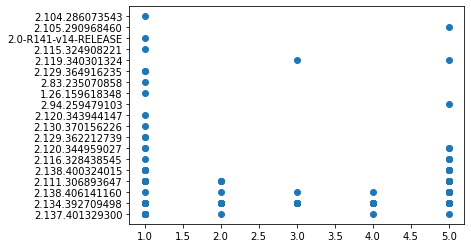

In [120]:
google_data = google_data.drop(columns=[ "repliedAt"])
google_data["replyContent"] = google_data["replyContent"].fillna("No_reply/No_data")
google_data["reviewCreatedVersion"] = google_data["reviewCreatedVersion"].fillna(value=google_data["reviewCreatedVersion"].mode()[0])
print(google_data.head(200))
plt.scatter(google_data["score"].head(200),google_data["reviewCreatedVersion"].head(200))
plt.show()

In [121]:
cat_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes == "O"]
total=paytm_data[cat_category].isnull().sum().sort_values(ascending=False)
percent = (paytm_data[cat_category].isnull().sum()/paytm_data[cat_category].isnull().count()).sort_values(ascending=False) # compute the percentage of missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                      Total   Percent
replyContent          12632  0.501230
repliedAt             12632  0.501230
reviewCreatedVersion   4108  0.163003
reviewId                  0  0.000000
userName                  0  0.000000
userImage                 0  0.000000
content                   0  0.000000
at                        0  0.000000


     Unnamed: 0                                           reviewId  \
0             0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1             1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2             2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3             3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4             4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   
..          ...                                                ...   
195         195  gp:AOqpTOHsbcuhCsSytsCk0seAMqSn0KshYU3z-bNu43L...   
196         196  gp:AOqpTOFm1SpplCdNS_1TnxOZg4UyVsnjmPqBZVH0yxS...   
197         197  gp:AOqpTOHFOU5EQSyQYZ15S8Jyj15tx_6dvDJAsRE3mOz...   
198         198  gp:AOqpTOHUqDW4UIlBrjHXxnxbosjJI9wE8kff6el8nWw...   
199         199  gp:AOqpTOFgeoVFr6fE72QOWOyqUOH9hUSmpPPIsrLSqmm...   

                    userName  \
0              HARSH KASHYAP   
1          manikeswar shabar   
2             Rajendra Kumar   
3               Kagga Balaji   

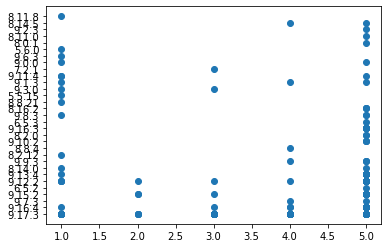

In [122]:
paytm_data = paytm_data.drop(columns=[ "repliedAt"])
paytm_data["replyContent"] = paytm_data["replyContent"].fillna("No_reply/No_data")
paytm_data["reviewCreatedVersion"] = paytm_data["reviewCreatedVersion"].fillna(value=paytm_data["reviewCreatedVersion"].mode()[0])
print(paytm_data.head(200))
plt.scatter(paytm_data["score"].head(400),paytm_data["reviewCreatedVersion"].head(400))
plt.show()

In [123]:
cat_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes == "O"]
total=phonepay_data[cat_category].isnull().sum().sort_values(ascending=False)
percent = (phonepay_data[cat_category].isnull().sum()/phonepay_data[cat_category].isnull().count()).sort_values(ascending=False) # compute the percentage of missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                      Total   Percent
replyContent           8805  0.749936
repliedAt              8805  0.749936
reviewCreatedVersion   2136  0.181927
reviewId                  0  0.000000
userName                  0  0.000000
userImage                 0  0.000000
content                   0  0.000000
at                        0  0.000000


     Unnamed: 0                                           reviewId  \
0             0  gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...   
1             1  gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...   
2             2  gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...   
3             3  gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...   
4             4  gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...   
..          ...                                                ...   
195         195  gp:AOqpTOGHsOYgda2HaM0PSMcjY7jiUWMVZ9DTNA_i3Tm...   
196         196  gp:AOqpTOEX_NK1WcBXpWGPeFgmVylrpHELAvfCqGmz4Jb...   
197         197  gp:AOqpTOGt-tprSSXNh0DVEQErI9MOcMC-RvlO09uw70c...   
198         198  gp:AOqpTOGSG29Ell_pj_4iD5z2OBLFH4oTh24eGtc0ipa...   
199         199  gp:AOqpTOFkzhDfVUEDGbHwdSgEaE91n5d1PN7mU0uaJK8...   

               userName                                          userImage  \
0             Akki Love  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  

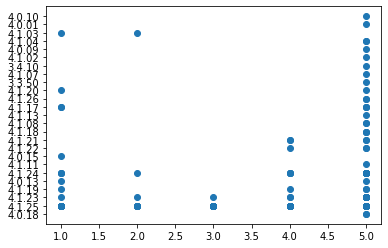

In [124]:
phonepay_data = phonepay_data.drop(columns=[ "repliedAt"])
phonepay_data["replyContent"] = phonepay_data["replyContent"].fillna("No_reply/No_data")
phonepay_data["reviewCreatedVersion"] = phonepay_data["reviewCreatedVersion"].fillna(value=phonepay_data["reviewCreatedVersion"].mode()[0])
print(phonepay_data.head(200))
plt.scatter(phonepay_data["score"].head(400),phonepay_data["reviewCreatedVersion"].head(400))
plt.show()

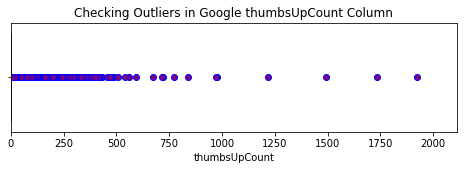

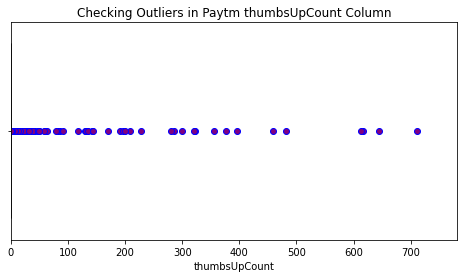

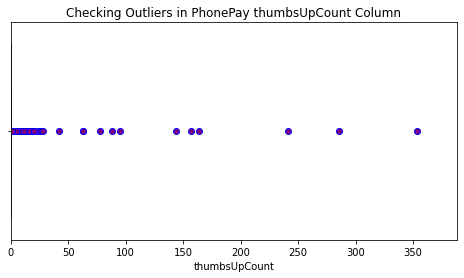

In [125]:
plt.figure(figsize=(8,2))
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='blue')
plt.title("Checking Outliers in Google thumbsUpCount Column")
plt.xlim(google_data.thumbsUpCount.min(), google_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=google_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(8,4))
plt.title("Checking Outliers in Paytm thumbsUpCount Column")
plt.xlim(paytm_data.thumbsUpCount.min(), paytm_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=paytm_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(8,4))
plt.title("Checking Outliers in PhonePay thumbsUpCount Column")
plt.xlim(phonepay_data.thumbsUpCount.min(), phonepay_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=phonepay_data.thumbsUpCount, flierprops=flierprops)

In [126]:
google_data = google_data[google_data["thumbsUpCount"] <=500]
paytm_data = paytm_data[paytm_data["thumbsUpCount"] <=550]
phonepay_data = phonepay_data[phonepay_data["thumbsUpCount"] <=100]
print(google_data.shape)
google_data.head()

(34213, 10)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,18-11-2021 17:03,Hi Len. Could you try the steps in this guide ...
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,18-11-2021 16:43,No_reply/No_data
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,18-11-2021 16:12,No_reply/No_data
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,18-11-2021 16:06,No_reply/No_data
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,18-11-2021 15:48,No_reply/No_data


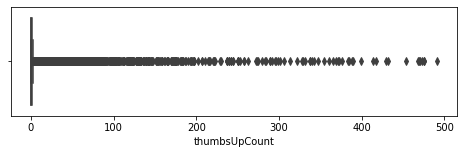

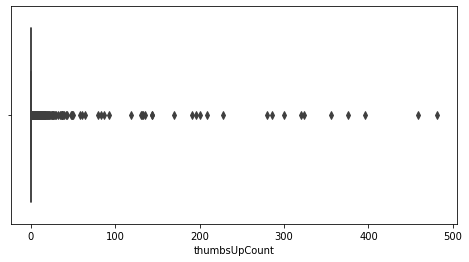

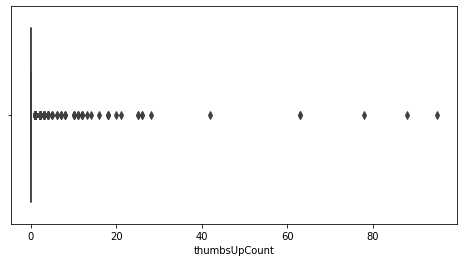

In [127]:
plt.figure(figsize=(8,2))
sns.boxplot(x=google_data.thumbsUpCount)
plt.figure(figsize=(8,4))
sns.boxplot(x=paytm_data.thumbsUpCount)
plt.figure(figsize=(8,4))
sns.boxplot(x=phonepay_data.thumbsUpCount)

In [128]:
google_data["upi_company"] = "Google"
paytm_data["upi_company"] = "paytm"
phonepay_data["upi_company"] = "phonepay"

In [129]:
google_data = google_data.sample(frac=1).reset_index(drop=True)
paytm_data = paytm_data.sample(frac=1).reset_index(drop=True)
phonepay_data = phonepay_data.sample(frac=1).reset_index(drop=True)

data = phonepay_data.append([paytm_data[:11735 ], google_data[:11735]], ignore_index=True)

data = data.rename(columns={"at": "review_created_at"})
data.head(10)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,review_created_at,replyContent,upi_company
0,9637,gp:AOqpTOGxz71QXqPokiXyrpPsXyNIRq-enutkBLe6pJg...,Murali Krishna,https://play-lh.googleusercontent.com/a/AATXAJ...,Awosome,5,0,4.0.16,11-11-2021 20:30,No_reply/No_data,phonepay
1,3078,gp:AOqpTOFGGzOFr9Epqu35b6_C1nE855C66-tXlsSx1Je...,Vaibhav pathak,https://play-lh.googleusercontent.com/a-/AOh14...,Gud work,5,0,4.1.25,16-11-2021 15:40,No_reply/No_data,phonepay
2,1726,gp:AOqpTOEkoFqlX2xM2pbO5tZ9QG_4UOO-idxOD6e6k-5...,Prashant Kumar,https://play-lh.googleusercontent.com/a/AATXAJ...,The payment process is okay.,3,1,4.1.25,17-11-2021 14:36,"Hi Prashant, it is our constant endeavor to pr...",phonepay
3,8497,gp:AOqpTOFUnzKBN-LPiwYfVMDsydW4wVQfPOJj_Y2uNGy...,Shivanand Chinti,https://play-lh.googleusercontent.com/a/AATXAJ...,Excellent,5,0,4.1.24,12-11-2021 17:01,No_reply/No_data,phonepay
4,6692,gp:AOqpTOGAzSg-VMYsHzdy1Zo-LCfL8pz32X3BWeu4_0G...,Atheeq Hifzu,https://play-lh.googleusercontent.com/a/AATXAJ...,Very good to use,5,0,4.1.22,13-11-2021 20:57,No_reply/No_data,phonepay
5,1632,gp:AOqpTOEmmbziyDD136uFq97Gdxjb59JT2090yed46Wc...,School of Thought,https://play-lh.googleusercontent.com/a-/AOh14...,Super,5,0,4.1.25,17-11-2021 15:41,No_reply/No_data,phonepay
6,2529,gp:AOqpTOFga7RqbHWE4rF5nUf4TuAU6_EA4LF-DU1sgEN...,Bhrat,https://play-lh.googleusercontent.com/a/AATXAJ...,Bharat paswan,1,0,4.1.25,16-11-2021 21:17,Hi Bharat! Thank you for choosing PhonePe! Hel...,phonepay
7,4769,gp:AOqpTOFxz_sQcqkhob1dxGLoTvdElMn24qH9-iZlobo...,Ajay Yadav,https://play-lh.googleusercontent.com/a/AATXAJ...,Good service 👍👍👍👍👍👍,5,0,4.1.25,15-11-2021 12:11,No_reply/No_data,phonepay
8,4396,gp:AOqpTOH3t152-Mt0tgil9NsPDFFAfr0GRT16pAYsX14...,Dev Rathour,https://play-lh.googleusercontent.com/a-/AOh14...,You are good apps,5,0,4.1.24,15-11-2021 16:48,No_reply/No_data,phonepay
9,7904,gp:AOqpTOHeLYSLdRbOKAvG7_AqRgwq4Q_0UnVR_xhfF6p...,RK movies,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,4,0,4.1.03,12-11-2021 23:59,Thank you for the feedback. We are really glad...,phonepay


In [130]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,review_created_at,replyContent,upi_company
0,9612,gp:AOqpTOEH_jfw3mOr3ehTMhZzdLQ8ZA97HdL-Znp1NTb...,Giriraj Meena,https://play-lh.googleusercontent.com/a/AATXAJ...,A1,5,0,4.1.25,11-11-2021 20:46,No_reply/No_data,phonepay
1,6957,gp:AOqpTOGza1uU07cyagZEQweSvIljvawhoWaSmFqijMl...,Jaya Nishad,https://play-lh.googleusercontent.com/a-/AOh14...,Very good,5,0,9.17.3,13-11-2021 03:57,No_reply/No_data,paytm
2,2117,gp:AOqpTOHrr18WSy1NUHElogsPSHRPqOGAhg2cl8sP3Sw...,Rijju Mulani,https://play-lh.googleusercontent.com/a/AATXAJ...,Supar,5,0,4.1.25,17-11-2021 09:54,No_reply/No_data,phonepay
3,10531,gp:AOqpTOEvm8BEJ309BuWI9_Fsi9czUuwtw0ti7lkzLwR...,Gram Oscar,https://play-lh.googleusercontent.com/a-/AOh14...,Can't send payment from pakistan,1,0,2.111.306893647,03-10-2020 04:31,Hi Gram. Send and receive money from the Googl...,Google
4,29981,gp:AOqpTOERQ94b9tkrEAqUGgIb-WyUmxL7myKUCv7vp_9...,Jan Hanák,https://play-lh.googleusercontent.com/a-/AOh14...,"Very useful, nice. There are some features mis...",4,6,2.102.279356873,22-11-2019 13:35,No_reply/No_data,Google


In [131]:
data.shape

(35205, 11)

In [132]:
data = data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)
print(data.head(100))
print(data.shape)

                                              content  score  thumbsUpCount  \
0                                                  A1      5              0   
1                                           Very good      5              0   
2                                               Supar      5              0   
3                    Can't send payment from pakistan      1              0   
4   Very useful, nice. There are some features mis...      4              6   
..                                                ...    ...            ...   
95                                            Like it      5              0   
96                                          Great app      5              0   
97                                               good      5              0   
98                                               Thik      5              0   
99  Paytm is my favorite application for all payme...      5              0   

   reviewCreatedVersion review_created_at  \
0     

In [133]:
data_cap = data.duplicated().any()
print(data_cap)
data = data.drop_duplicates()
print(data.shape)

True
(35139, 7)


In [134]:
from statistics import stdev
def dataset_z(dataset):
  zscale = list()
  avg = sum(dataset) / len(dataset)
  stand = stdev(dataset)
  datar = (dataset - avg) / (stand)
  return datar
data2=dataset_z(data['thumbsUpCount'])
print("After normalisation Standard deviation is whihc is ",stdev(data2))
print(data2.head(20))



After normalisation Standard deviation is whihc is  1.0
0    -0.099626
1    -0.099626
2    -0.099626
3    -0.099626
4     0.405229
5    -0.015483
6    -0.015483
7    -0.099626
8    -0.015483
9    -0.099626
10   -0.099626
11   -0.099626
12   -0.099626
13   -0.015483
14   -0.099626
15   -0.099626
16   -0.099626
17   -0.099626
18   -0.015483
19   -0.099626
Name: thumbsUpCount, dtype: float64


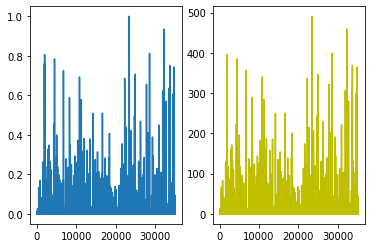

In [135]:
def dataset_minmax(data):
  minmax = list()
  value_min = min(data)
  value_max = max(data)
  minmax.append([value_min, value_max])
  nordata = (data - value_min) / (value_max - value_min)
  return nordata
x=list()
plt.subplot(1,2,2)
plt.plot(data["thumbsUpCount"],'y')
plt.subplot(1,2,1)
x= dataset_minmax(data['thumbsUpCount'])
plt.plot(x)

plt.show()


In [136]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,content,score,thumbsUpCount,reviewCreatedVersion,review_created_at,replyContent,upi_company
0,Good,5,0,4.1.25,12-11-2021 09:55,No_reply/No_data,phonepay
1,Very worst costumer service this app much time...,1,0,9.17.3,11-11-2021 21:00,"Hi, we regret the inconvenience caused to you....",paytm
2,This app is wonderful!,5,1,2.115.324908221,21-08-2020 09:27,No_reply/No_data,Google
3,Good,4,0,8.16.2,05-11-2021 18:08,Thank you! It gives us immense joy seeing your...,paytm
4,Pay pal opt,3,0,2.114.322833478,03-09-2020 21:24,No_reply/No_data,Google


In [137]:
data["review_created_at"] = pd.to_datetime(data["review_created_at"])
data["Year"] = data['review_created_at'].dt.year
data["month"] = data['review_created_at'].dt.month
data = data[["upi_company", "Year", "month", "content", "score", "thumbsUpCount", "replyContent","reviewCreatedVersion"]]
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent,reviewCreatedVersion
0,phonepay,2021,12,Good,5,0,No_reply/No_data,4.1.25
1,paytm,2021,11,Very worst costumer service this app much time...,1,0,"Hi, we regret the inconvenience caused to you....",9.17.3
2,Google,2020,8,This app is wonderful!,5,1,No_reply/No_data,2.115.324908221
3,paytm,2021,5,Good,4,0,Thank you! It gives us immense joy seeing your...,8.16.2
4,Google,2020,3,Pay pal opt,3,0,No_reply/No_data,2.114.322833478


In [138]:
#Clean text punctuation marks and characters before analysis.
data.loc[:,'content'] = data.loc[:,'content'].str.replace('?','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('!','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('@','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('*','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('&','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace(':','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('.','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('-','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('%','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('$','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace(',','',regex=True)

In [139]:
#some frequent words with no sentiment attached to them should be removed
data.loc[:,'content'] = data.loc[:,'content'].str.replace('app','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('paytm','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('google','',regex=True)

<ipython-input-140-cfdb08568f2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["content"] = str(data5["content"]).lower()


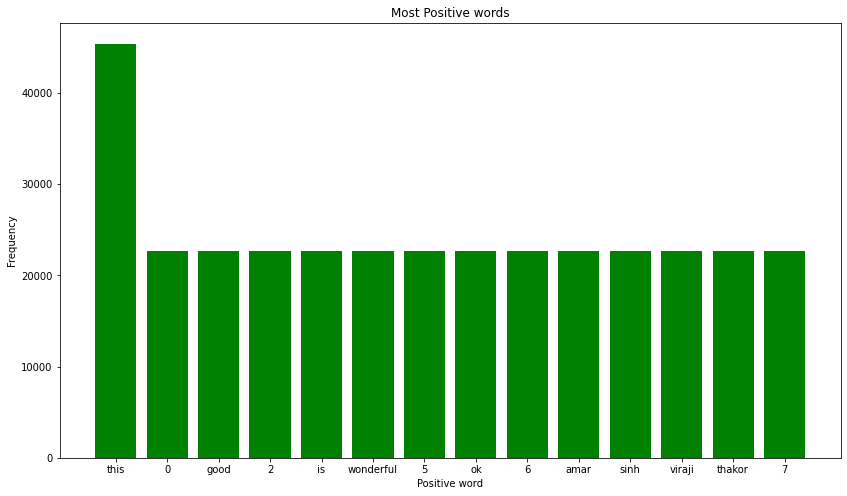

In [140]:
from keras.preprocessing.text import Tokenizer
#Lets visualize frequent occuring words in review=5 and review = 1 along with its no. of occurences
data5 = data[data['score']==5]
data5["content"] = str(data5["content"]).lower()
corp = data5['content'].values
tok = Tokenizer(num_words=250, split=' ')
tok.fit_on_texts(data5['content'].values)
#Lists for words and their count
P = []
CNT = []
N = []
CNT1 =[]
for i in range(1,15):
    P.append(tok.index_word[i])
for word in P:
    CNT.append(tok.word_counts[word])
plt.figure(figsize=(14,8))
plt.bar(P,CNT,color='green')
plt.title('Most Positive words')
plt.xlabel('Positive word')
plt.ylabel('Frequency')
plt.show()

<ipython-input-141-4617720c80a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["content"] = str(data1["content"]).lower()


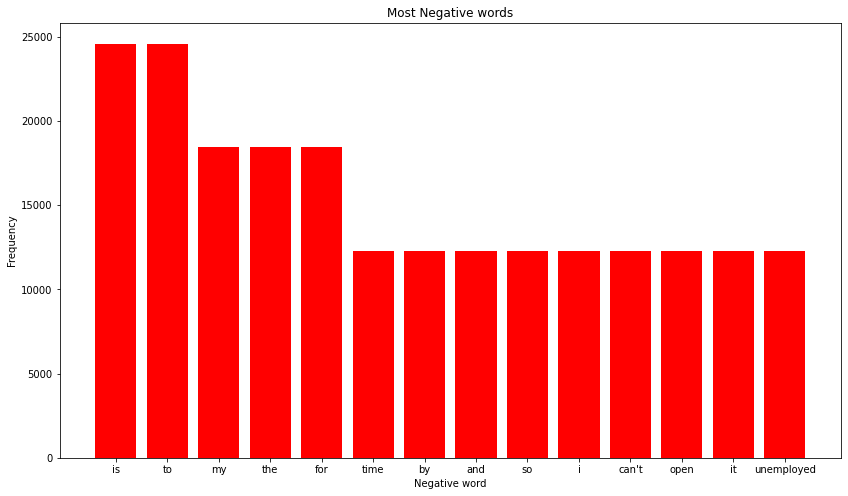

In [141]:
data1 = data[(data['score']==1)]
data1["content"] = str(data1["content"]).lower()
corp1 = data1['content'].values
tokn = Tokenizer(num_words=250, split=' ')
tokn.fit_on_texts(data1['content'].values)
for n in range(1,15):
    N.append(tokn.index_word[n])
for word in N:
    CNT1.append(tokn.word_counts[word])
plt.figure(figsize=(14,8))
plt.bar(N,CNT1,color='red')
plt.title('Most Negative words')
plt.xlabel('Negative word')
plt.ylabel('Frequency')
plt.show()

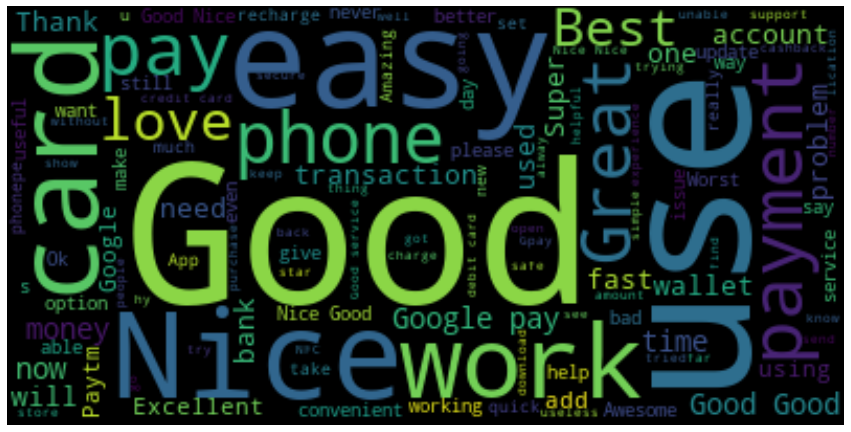

In [142]:
import wordcloud
common_words=''
for i in data.content:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
A = wordcloud.WordCloud().generate(common_words)
plt.figure(figsize=(15,12))
plt.imshow(A, interpolation='bilinear')
plt.axis("off")
plt.show()

In [143]:
backup_data = data.copy()

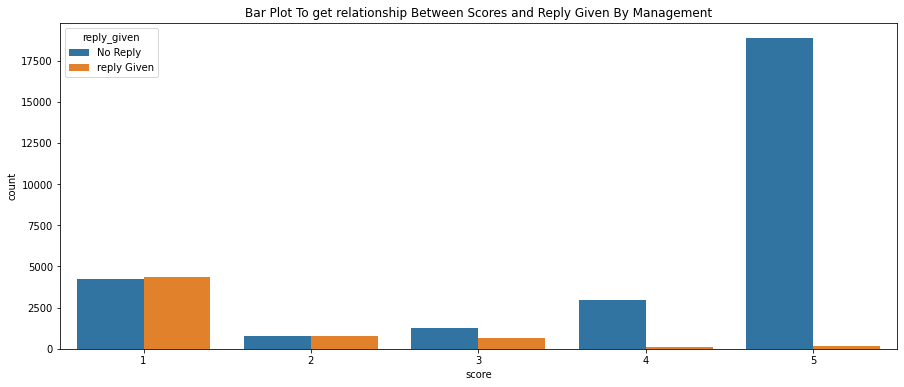

In [144]:
google_data["reply_given"] = google_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

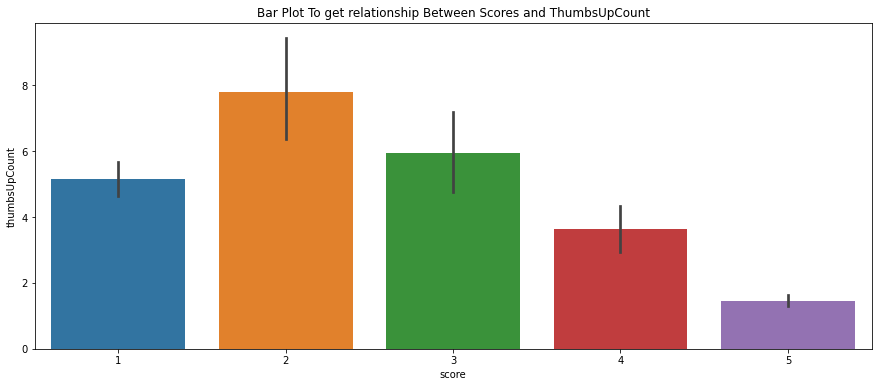

In [145]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

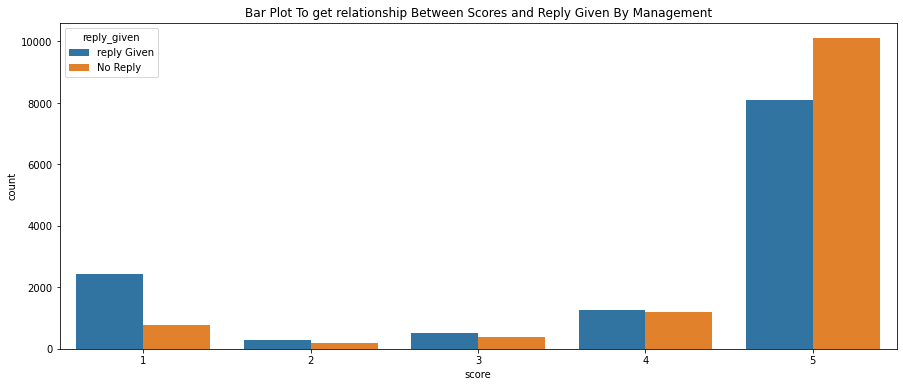

In [146]:
paytm_data["reply_given"] = paytm_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

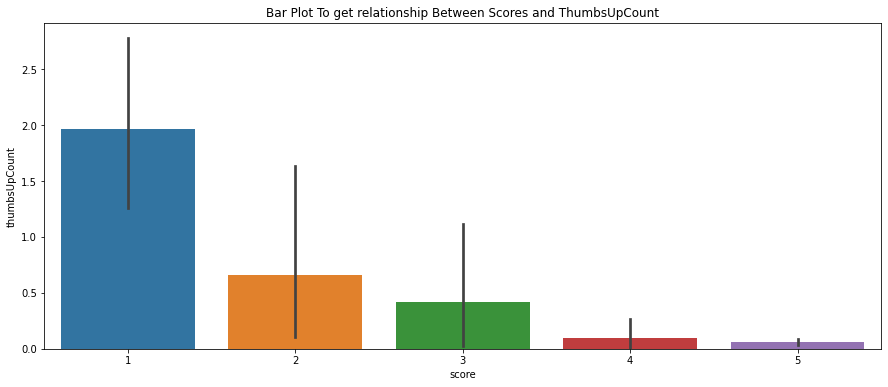

In [147]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

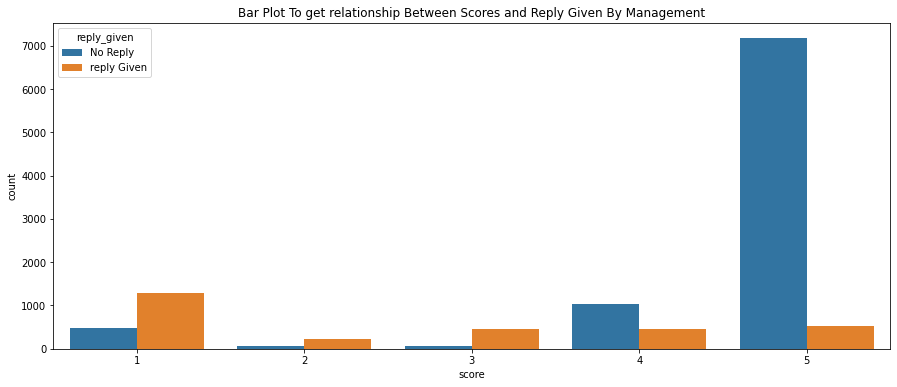

In [148]:
phonepay_data["reply_given"] = phonepay_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

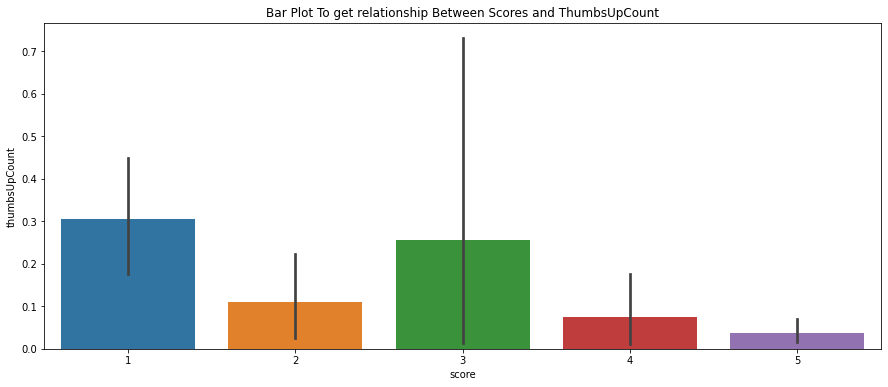

In [149]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

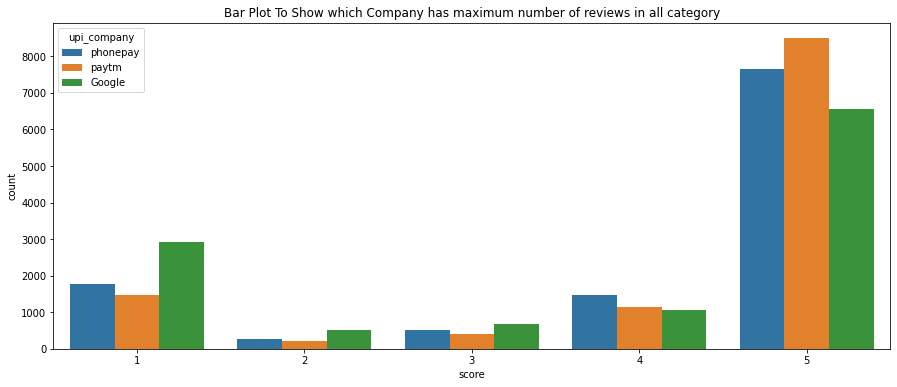

In [150]:
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has maximum number of reviews in all category')
plt.show()

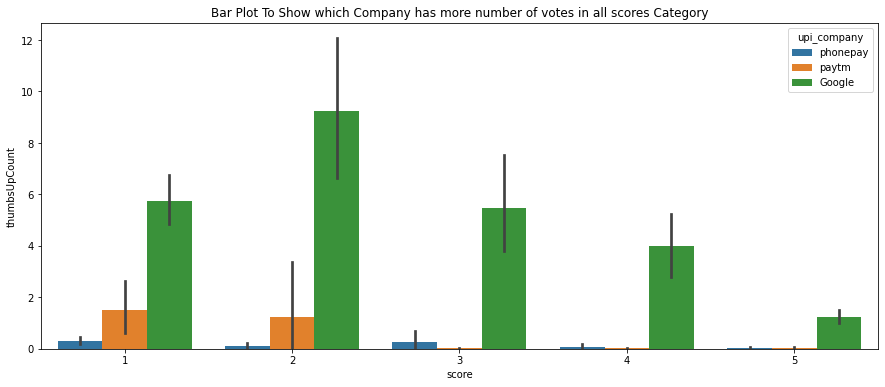

In [151]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has more number of votes in all scores Category')
plt.show()

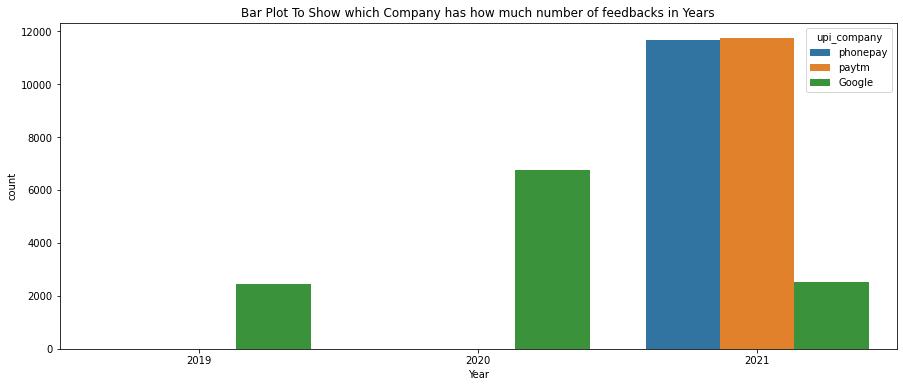

In [152]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="Year", hue="upi_company")
plt.title('Bar Plot To Show which Company has how much number of feedbacks in Years')
plt.show()

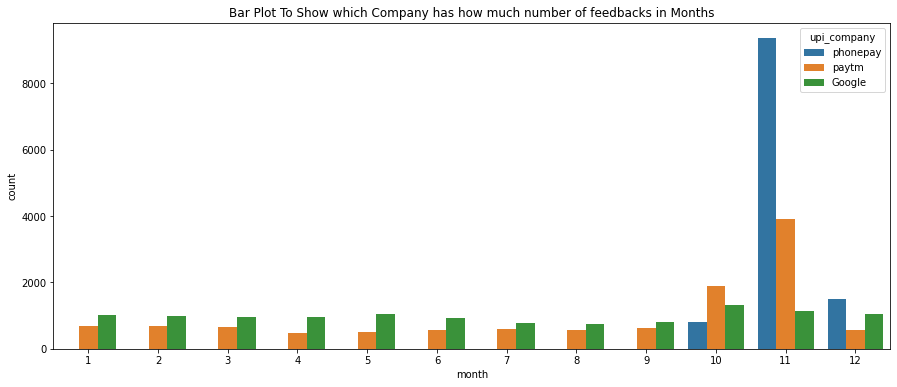

In [153]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="month", hue="upi_company")
plt.title('Bar Plot To Show which Company has how much number of feedbacks in Months')
plt.show()

Sntement Analysis:- Sentiment analysis systems help to gather insights from unorganized and unstructured text 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


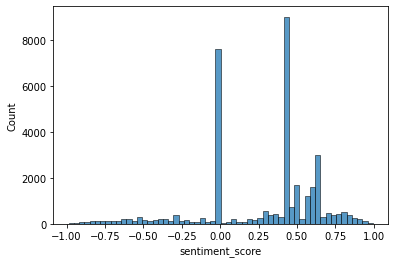

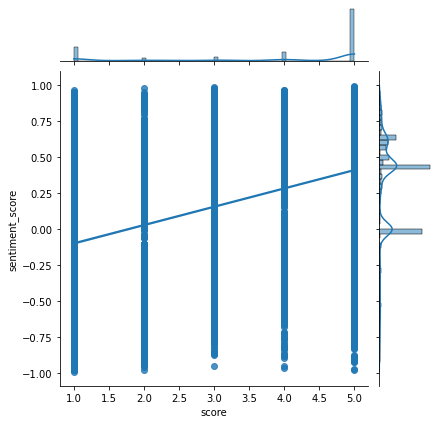

In [178]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment scores
sentiment_scores = [sia.polarity_scores(str(review))['compound'] for review in data['content']]


# Add the sentiment scores to the dataset
data['sentiment_score'] = sentiment_scores

# Plot the distribution of sentiment scores
sns.histplot(data['sentiment_score'], kde=False)
plt.show()

# Plot the relationship between score and sentiment score
sns.jointplot(x='score', y='sentiment_score', data=data, kind='reg')
plt.show()

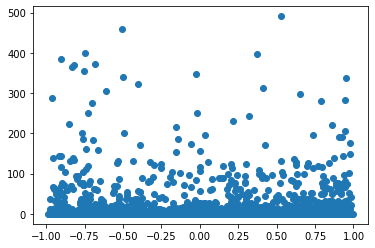

In [179]:
plt.scatter(data['sentiment_score'], data['thumbsUpCount'])
plt.show()

 feature analysis

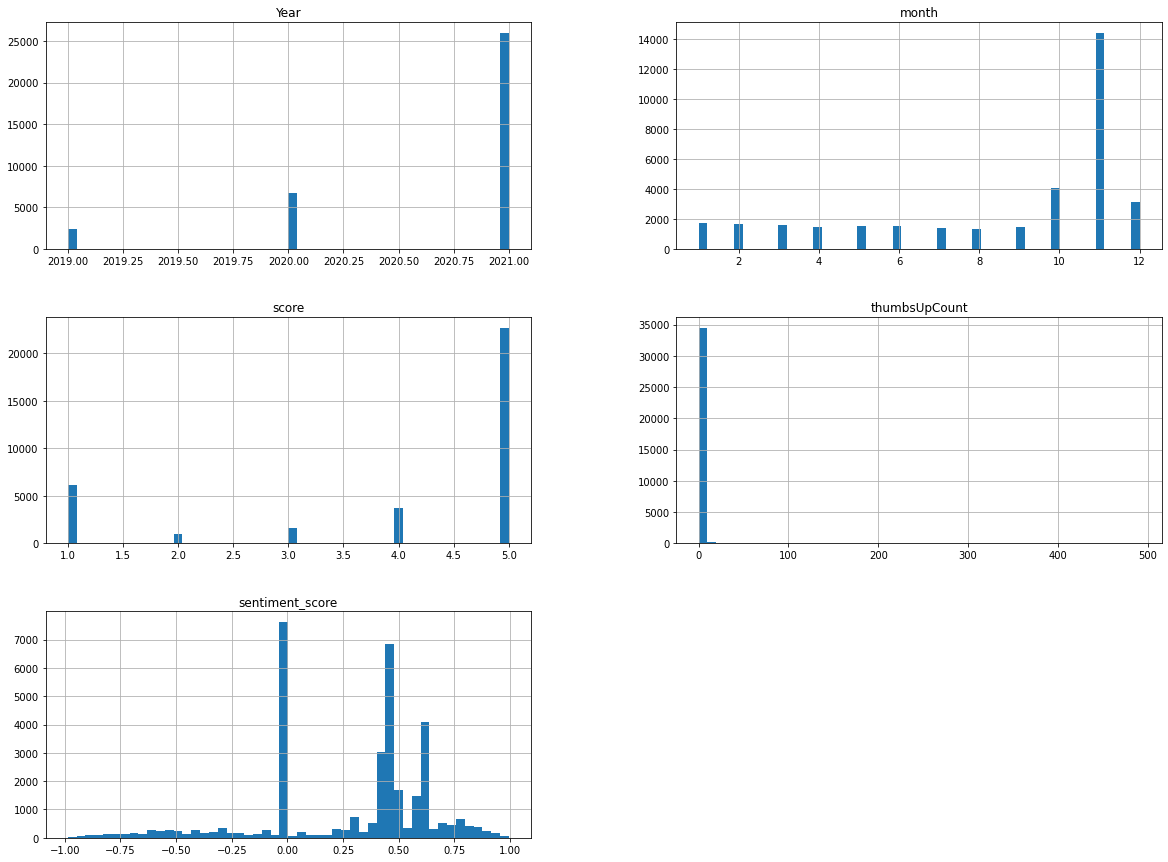

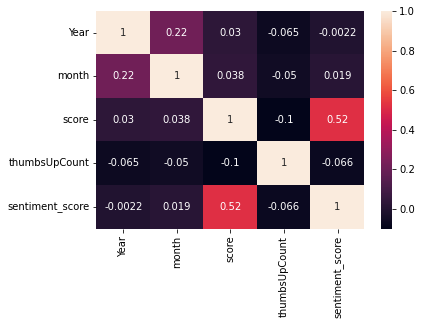

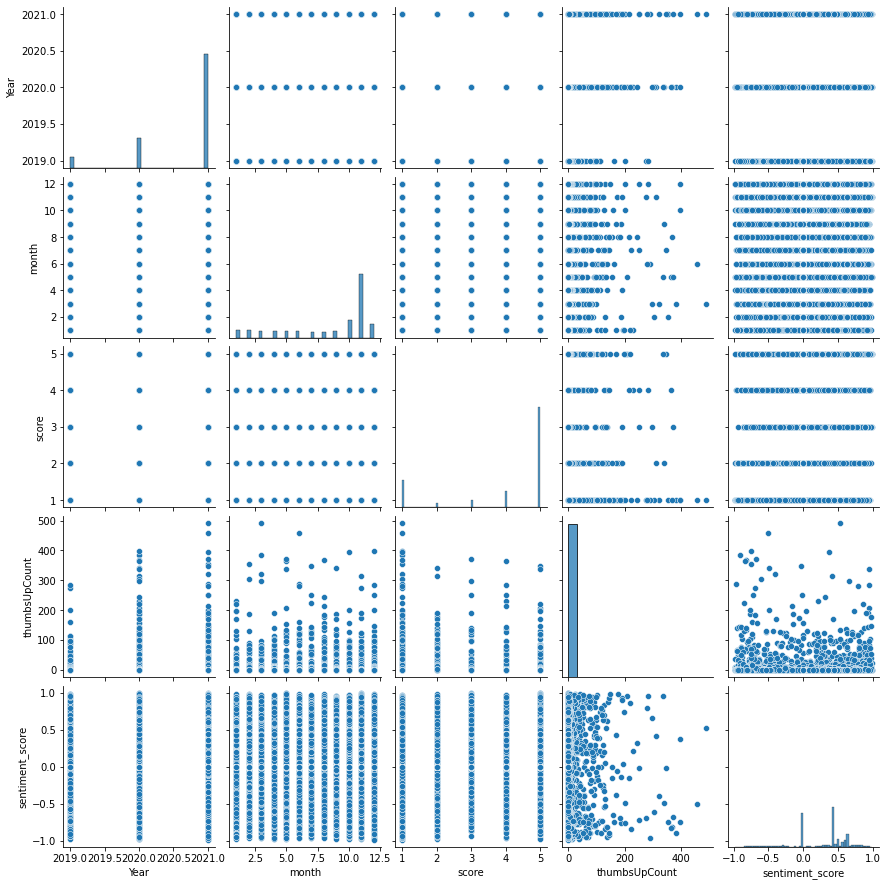

In [155]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Plot a heatmap to visualize the correlation between the variables
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Plot scatterplots to visualize the relationships between the variables
sns.pairplot(data)
plt.show()

Association Rule mining

In [156]:
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df = data[[ 'score', 'thumbsUpCount']]

# Transform the data into a transactional format
te = TransactionEncoder()
te_ary = te.fit(df.values).transform(df.values)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent item sets
frequent_itemsets = apriori(df_transactions, min_support=0.05, use_colnames=True)

# Generate association rules
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(association_rules)



  antecedents consequents  antecedent support  consequent support   support  \
0         (1)         (0)            0.210564            0.883833  0.133128   
1         (4)         (0)            0.110248            0.883833  0.091807   
2         (0)         (5)            0.883833            0.648283  0.602322   
3         (5)         (0)            0.648283            0.883833  0.602322   

   confidence      lift  leverage  conviction  
0    0.632248  0.715348 -0.052975    0.315884  
1    0.832731  0.942182 -0.005634    0.694494  
2    0.681489  1.051222  0.029349    1.104255  
3    0.929104  1.051222  0.029349    1.638569  


Time Series Mining

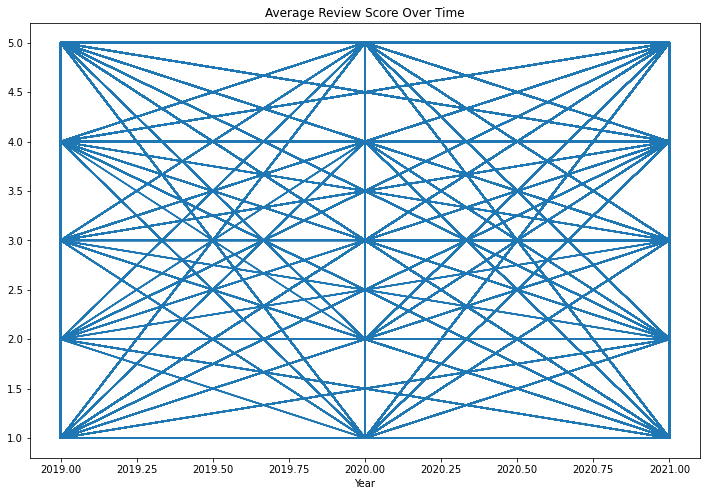

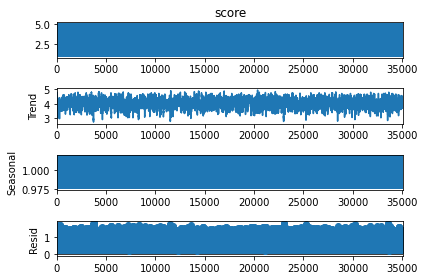

In [203]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Set the 'at' column as the index of the data frame
df = data.set_index('Year')

# Plot the average review score over time
df['score'].plot(figsize=(12,8), title='Average Review Score Over Time')
plt.show()
# Decompose the time-series data into trend, seasonality, and residuals
result = seasonal_decompose(data['score'], model='multiplicative',period=24)
result.plot()
plt.show()

In [174]:
from textblob import TextBlob

# Extract the content column as a list of strings
reviews = data['content'].tolist()

# Initialize an empty list to store the results
opinions = []

# Loop through each review
for review in reviews:
    # Create a TextBlob object from the review
    blob = TextBlob(str(review))
    
    # Extract the opinions from the TextBlob object
    opinion = blob.sentiment
    
    # Append the opinions to the opinions list
    opinions.append(opinion)

# Convert the opinions list to a Pandas DataFrame
opinions_df = pd.DataFrame(opinions, columns=['polarity', 'subjectivity'])
print(data['content'],opinions_df)

0                                                     Good
1        Very worst costumer service this  much time co...
2                                       This  is wonderful
3                                                     Good
4                                              Pay pal opt
                               ...                        
35134    Handy I like that it shows me the transactions...
35135                                                 Good
35136    Small Business Administration Director Records...
35137                                         I like this 
35138    The organize the  to sell or hidden publicity ...
Name: content, Length: 35139, dtype: object        polarity  subjectivity
0      0.700000      0.600000
1     -0.400000      0.600000
2      1.000000      1.000000
3      0.700000      0.600000
4      0.000000      0.000000
...         ...           ...
35134  0.600000      0.900000
35135  0.700000      0.600000
35136  0.004545      0.261818
35137  

opnion mining gives  Polarity refers to the strength of an opinion. It could be positive or negative and Subjectivity refers to the degree to which a person is personally involved in an object

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


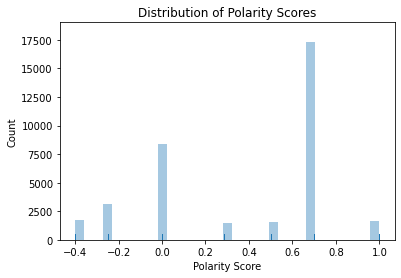

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


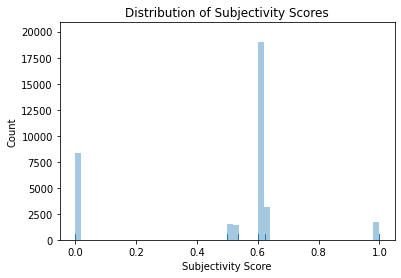

In [182]:
df['polarity'] = data['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = data['content'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Plot the distribution of polarity scores
sns.distplot(df['polarity'], kde=False, rug=True)
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

# Plot the distribution of subjectivity scores
sns.distplot(df['subjectivity'], kde=False, rug=True)
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity Score')
plt.ylabel('Count')
plt.show()